# Lab 4 - Reactance of Capacitors and Inductors, Phasors

### PHYS 222, Spring 2022, Dr. Ben Zwickl

### Goals
* **Use cursors and math tools within the oscilloscope to**
    * measure phase shift between two oscillations.
    * estimate amplitude of waveform.
* **Make Python plots with log and semilog scales**
* **Measure the reactance of a capacitor, $X_C$**
    * Observe the 90 degree phase shift between the current and the voltage across capacitor
    * Show frequency dependence of $X_C$.
* **Measure the reactance of an inductor, $X_L$**
    * Observe the 90 degree phase shift between the current and the voltage across inductor
    * Show frequency dependence of $X_L$.
    * Observe how the internal resistance changes the impedance of an ideal inductor


In [1]:
# load packages at the top of your notebook. 
# We will always use numpy and matplotlib.pyplot.
# In future weeks, you should add these lines yourself

import numpy as np
import matplotlib.pyplot as plt

# Task 1: Copy your `load_waveform` function from Lab 3

**Insert cell or cells below to record your answers**

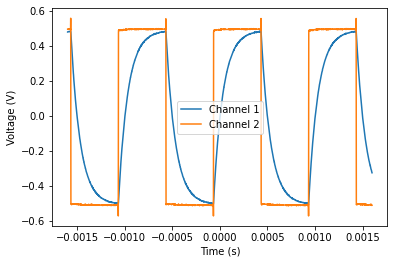

In [6]:
# RUN THESE TEST CASES BUT DON'T EDIT THEM

### Test cases for load_waveform
data = load_waveform("Sample_Scopy_Data.csv")
assert len(data) == 3        # make sure the function returns a list of 3 things
t, ch1, ch2 = data            # unpack for analysis
assert len(t) == len(ch1) == len(ch2) == 3200  # check length of imported data set
assert abs(ch1.mean() - -0.0033719303437499894)/-0.0033719303437499894 < 1e-4  # check the values on ch1
assert (np.mean( np.abs(ch2) ) - 0.5011812406249)/ 0.5011812406249 < 1e-4  # check the values on ch2
assert abs( (t.min() - (-0.0016)) ) /abs(-0.0016) < 1e-4   # check the min time

# Task 2: Build an RC circuit, collect data, and plot
![Lab 4 RC  circuit diagram](Fig_RC_Task3.png)
The circuit values are chosen are chosen so that the range of drive frequencies can span a wide range.

1. Build the RC circuit.
1. Use the Signal Generator (W1) as the sinusoidal voltage source
    * Set to **sine wave**. 
    * A 5 V amplitude (max possible) is beneficial for our measurements today to give us an easier time measuring voltages that get smaller at either high or low frequencies. 
    * 1 kHz is fine.
1. Use both channels of the oscilloscope (1+/1- and 2+/2-) to simultaneously measure the voltage across the capacitor $V_C$ and across the resistor $V_R$.
1. Save and plot the data in your Jupyter notebook using your `load_waveform` function. 
1. Use the cursors in Scopy to measure the time shift of $V_C$ relative to $V_R$. 
1. Use the Math functions to measure $V_{pp}$ of the capacitor vand resistor.
1. Based on your measurements, compute the following 
    * the peak-to-peak amplitude of the current 
    * the capacitive reactance $X_C = V_C/I$
    * the phase difference (in degrees) between $V_C$ and $V_R$ (or $I$).  Does it show the expected 90 degree phase difference? 

**Insert cell or cells below to record your answers**

# Task 3: Frequency dependent impedance of a capacitor
This task extends the analysis of the Task 2 to multiple frequencies. The goal is to make measurements that verify the complex-valued impedance formula for a capacitor.

$$ X_C = \frac{1}{\omega C} $$

Because $X_C$, relates current to voltage similar to Ohm's law, we have 

$$V_C = -j X_C I_C = -j \frac{1}{\omega C} I_C $$

#### We will be able to test 3 main features of this formula:
* The imaginary $i$ means the sinusoidal voltage across capacitor is 90 degrees behind of the sinusoidal current. There is a 90 degree phase shift between them.
* The magnitude of impedance decreases like $1/\omega$
* The magnitude is inversely proportional to capacitance $C$

#### Suggested steps

1. Calculate the frequency (in Hz) where the capacitive reactance $X_C$ has the same magnitude value as the resistance $R$. We will call this $f_{RC}$.  
1. Select drive frequencies that span well below $f_{RC}$ to a bit above. I picked values approximately $0.01 f_{RC}$ up to $10f_{RC}$. Use a log-scale for spacing frequencies, such as 100, 300, 1000, 3000, etc.
1. Measure the time-shift between the two waves and use the cursors to measure the $\Delta t$
1. Measure the amplitude of the Ch1 and Ch2 sine waves. $V_{pp}$ - peak-to-peak amplitude is a good choice. It can be read using the "Measurement tools
1. Make a table of the measurements 
    * I recommend making a CSV file, either as a Google Sheet or directly in JupyterHub. Then import the CSV file so you have the data in a numpy array.
1. Based on your measurements, compute the following at each frequency
    * the current 
    * the magnitude of the capacitive impedance
    * Compute the phase between $V_C$ and $V_R$. 
1.  Similar to this example, create a pair of plots showing 
    * phase shift between $I$ and $V_C$ versus frequency (in Hz)
    * The reactance $X_C$ vs frequency (in Hz) 
    
#### Example data table for this task.
You can directly create a CSV file in JupyterHub. 
![Example data](Fig_Task3_data_table.png)

Note the use of logarithmic scales on the plots with [`plt.semilogx`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semilogx.html) and [`plt.loglog`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.loglog.html).
![Example data table](example_XC_plots.png)

    
**Insert cell or cells below to record your answers**

# Task 4: Frequency dependence of the inductor
![RL circuit for measuring impedance of inductor](Fig_RL_Task4.png)

This is similar to Task 3, but for the inductor. The goal is to make measurements that demonstrate the complex-valued impedance formula for an inductor.

$$ X_L = \omega L $$

Because $X_L$, relates current to voltage similar to Ohm's law, we have 

$$V_L = j X_L I_L = j \omega L I_L $$

#### We will be able to test 3 main features of this formula:
* The imaginary $-i$ means the sinusoidal voltage across inductor is 90 degrees ahead of the sinusoidal current. There is a 90 degree phase shift between them.
* The magnitude of impedance increases with $\omega$
* The magnitude is proportional to inductance $L$
* The formula breaks down for small $\omega$ because the inductor is not ideal

#### Suggested steps
1. Build the circuit. 
1. At what frequency (in Hz) should $X_L$ and $R$ have the save value?
1. Select drive frequencies that span well below to a little above $f_{RL} = 1/\tau_{RL}$ where $\tau_{RL}=L/R$ . I picked frequencies using a log scale (so 100, 300, 1000, etc).
1. Use the cursors to measure the $\delta t$ between the Voltage across the inductor and resistor. Note which is leading.
1. Measure the peak-to-peak amplitude $V_{pp}$ is a good choice.
1. Make a table of the measurements 
    * I recommend making a CSV file, either as a Google Sheet or directly in JupyterHub. Then use `np.genfromtxt` to load the CSV file into a numpy array.
1. Based on your measurements, compute the following 
    * the current 
    * the magnitude of the capacitive impedance
    * the phase phase
1.  Similar to the example below, create a pair of subplots showing 
    * phase shift between $I$ and $V_L$ versus frequency
    * The inductive reactance $X_L$ vs frequency 
1. Answer the following questions:
    * How does the intrinsic resistance of the inductor change the two graphs?
    * Does the intrinsic resistance matter more at high or low frequencies? Why?
#### Example data from this task (note your frequencies will be different because this was taken for a 100 Ohm resistor)
![Example data](example_XL_plots.png)
    
**Insert cell or cells below to record your answers**